In [39]:
import numpy as np
import torch
from torch.utils.data import random_split
from tqdm import tqdm

from dataloader import RefCOCOg
from yoco import YOCO

# device = "cuda" if torch.cuda.is_available() else "cpu"

device = "mps"  # for Apple Silicon GPU acceleration


In [40]:
dataset = RefCOCOg(ds_path='dataset/refcocog')

train_split = 0.8

train_ds, test_ds = random_split(dataset, [int(train_split * len(dataset)), len(dataset) - int(train_split * len(dataset))])

print(f"Dataset Size: {len(dataset)}\n---")
print(f"Train Dataset Size: {len(train_ds)}")
print(f"Test Dataset Size: {len(test_ds)}")

yoco_model = YOCO(device=device, quiet=False, categories=dataset.categories)


Dataset Size: 49822
---
Train Dataset Size: 39857
Test Dataset Size: 9965


Using cache found in /Users/azel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


[INFO] Running YOLO on the image...
[INFO] YOLO found 3 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...
[INFO] g.t. category: person | pred. category: snowboard


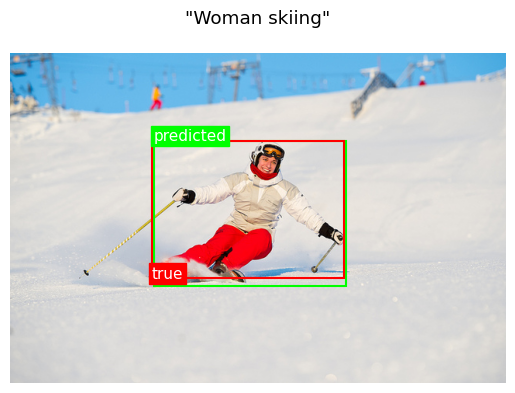

[INFO] Running YOLO on the image...
[INFO] YOLO found 3 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...
[INFO] g.t. category: person | pred. category: snowboard


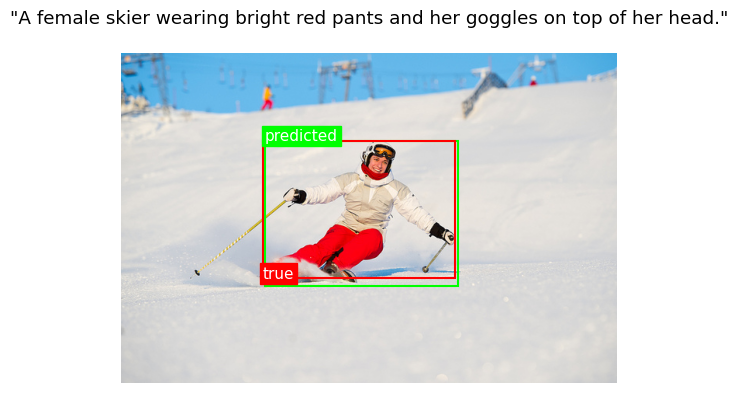

In [65]:
%matplotlib inline

for n in range(1):
    idx = np.random.randint(0, len(dataset))
    sample = dataset[idx]

    for sentence in sample.sentences:
        yoco_model(sample, sentence)


---

In [13]:
yoco_model = YOCO(device=device, categories=dataset.categories)

euclidean_dists, cosine_sims, iou_scores, recall_scores = list(), list(), list(), list()

# for sample in tqdm(test_ds, desc=f"Testing on {len(test_ds)} images"):

for idx in tqdm(range(100), desc=f"Testing on {100} images"):
    sample = test_ds[idx]

    for sentence in sample.sentences:

        try:
            sc = yoco_model(sample, sentence)
        except ValueError:
            continue

        # Semantic Similarity
        euclidean_dists.append(sc["euclidean"])
        cosine_sims.append(sc["cosine"])

        # Localization Accuracy
        iou_scores.append(sc["iou"])

        # Grounding Accuracy
        recall_scores.append(sc["recall"])

print(f"Avg. Euclidean Distance: {np.mean(euclidean_dists)}")
print(f"Avg. Cosine Similarity: {np.mean(cosine_sims)}")
print(f"Avg. IoU: {np.mean(iou_scores)}")
print(f"Avg. Recall: {np.mean(recall_scores)}")


Using cache found in /Users/azel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Testing on 100 images: 100%|██████████| 100/100 [01:11<00:00,  1.39it/s]

Avg. Euclidean Distance: 10.405669382105323
Avg. Cosine Similarity: 0.15139581820883677
Avg. IoU: 0.5289507303778631
Avg. Accuracy: 0.4712041884816754
